In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import datetime
import time
from calendar import timegm

In [11]:
height = 500
width = 500
blank_image = np.zeros((height,width,3), np.uint8)

In [12]:
position = (height / 2, width / 2)
p = '%Y-%m-%dT%H:%M:%S.%fZ'
mytime = "1900-01-01T00:00:00.07Z"

epoch = timegm(time.strptime(mytime, p))
#print(epoch)
#print(datetime.datetime(1991,2,26,13,30).timestamp())
# blank_image[int(height/2)][int(width/2)] = [255,255,255]
random.seed(a=epoch)

In [13]:
def dibujar(imagen, posicion, direccion):
    # direccion 0=up, 1=left, 2=down, 3=right
    
    hi, wi = int(position[0]), int(position[1])
    height, width, channels = imagen.shape
    # ciao <3
    #print(f'Shape image: {imagen.shape}, posicion: {posicion}, direccion: {direccion}')
    #print(f'posicion inicial: fila:{hi}, columna:{wi}')
    if direccion == 2:
        wf = wi
        hf = hi + int(random.randint(0, height - hi))
    elif direccion == 0:
        wf = wi
        hf = hi - int(random.randint(0, hi))
    elif direccion == 1:
        wf = wi - int(random.randint(0, wi))
        hf = hi
    elif direccion == 3:
        wf = wi + int(random.randint(0, width - wi))
        hf = hi
    colour = (int(random.randint(0, 255)), int(random.randint(0, 255)), int(random.randint(0, 255)))
    #print(f'Shape image: {imagen.shape}, posicion: {posicion}, direccion: {direccion}')
    #print(f'posicion final: fila:{hf}, columna:{wf}, color: {colour}')
    
    posicion = (hf, wf)
    cv2.line(imagen,(wi, hi),(wf, hf),colour,5)
    return imagen, posicion

In [133]:
blank_image, position = dibujar(blank_image, position, 0)

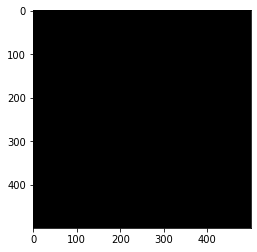

In [14]:
# The important part - Correct BGR to RGB channel
img = cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB)

# Plot
plt.imshow(img)

In [15]:
position

(250.0, 250.0)

In [16]:
i =0
import copy
image_array = []
while i <1000:
    blank_image, position = dibujar(blank_image, position, i % 4)
    i += 1
    image_array.append(copy.deepcopy(blank_image))

print(len(image_array))
name = "Name.mp4"
encoder = cv2.VideoWriter_fourcc(*'mp4v')
fps = 48
size = (height, width)

out = cv2.VideoWriter(name, encoder, fps, size)
 
for i in range(len(image_array)):
    out.write(image_array[i])
out.release()

cv2.imwrite('Name.jpg', blank_image)

    

1000


True

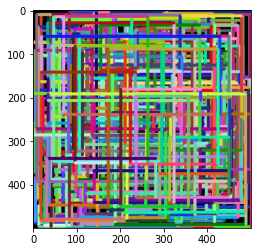

In [17]:
# The important part - Correct BGR to RGB channel
img = cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB)

# Plot
plt.imshow(img)

In [281]:
import imageio
import os, sys

class TargetFormat(object):
    GIF = ".gif"
    MP4 = ".mp4"
    AVI = ".avi"

def convertFile(inputpath, targetFormat):
    """Reference: http://imageio.readthedocs.io/en/latest/examples.html#convert-a-movie"""
    outputpath = os.path.splitext(inputpath)[0] + targetFormat
    print("converting\r\n\t{0}\r\nto\r\n\t{1}".format(inputpath, outputpath))

    reader = imageio.get_reader(inputpath)
    fps = reader.get_meta_data()['fps']

    writer = imageio.get_writer(outputpath, fps=fps)
    for i,im in enumerate(reader):
        sys.stdout.write("\rframe {0}".format(i))
        sys.stdout.flush()
        writer.append_data(im)
    print("\r\nFinalizing...")
    writer.close()
    print("Done.")

convertFile("Name.mp4", TargetFormat.GIF)

converting
	Martina.mp4
to
	Martina.gif
frame 999
Finalizing...
Done.
